In [3]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%run ../scripts/util_func.py
%run ../scripts/model_func.py

In [4]:
# import data to dataframe

data = pd.read_csv("/home/dominic/Documents/publications/sensors2021/offline_model_training/kinematic_models_training/data/data_new.csv") 

data = data.iloc[1:]

print(data)

       Unnamed: 0      ros_time  icp_index  cmd_left_vel  meas_left_vel  \
1               1  0.000000e+00        0.0           0.0            0.0   
2               2  1.602249e+18        0.0           0.0            0.0   
3               3  1.602249e+18        0.0           0.0            0.0   
4               4  1.602249e+18        0.0           0.0            0.0   
5               5  1.602249e+18        0.0           0.0            0.0   
...           ...           ...        ...           ...            ...   
17460       17460  1.602249e+18     8717.0           0.0            0.0   
17461       17461  1.602249e+18     8718.0           0.0            0.0   
17462       17462  1.602249e+18     8718.0           0.0            0.0   
17463       17463  1.602249e+18     8719.0           0.0            0.0   
17464       17464  1.602249e+18     8719.0           0.0            0.0   

       cmd_right_vel  meas_right_vel  icp_pos_x  icp_pos_y  icp_quat_x  \
1                0.0     

In [5]:
# convert dataframe to numpy array

array = data.to_numpy()
array =np.delete(array,[0],axis=0)

time_arr = array[:,1]
time_arr = (time_arr - time_arr[0]) * 10**(-9)
icp_index_arr = array[:,2]

left_vel_cmd_arr = array[:,3]
left_vel_meas_arr = array[:,4]
right_vel_cmd_arr = array[:,5]
right_vel_meas_arr = array[:,6]

icp_x_arr = array[:,7]
icp_y_arr = array[:,8]

icp_z_arr = array[:,9]
icp_w_arr = array[:,10]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


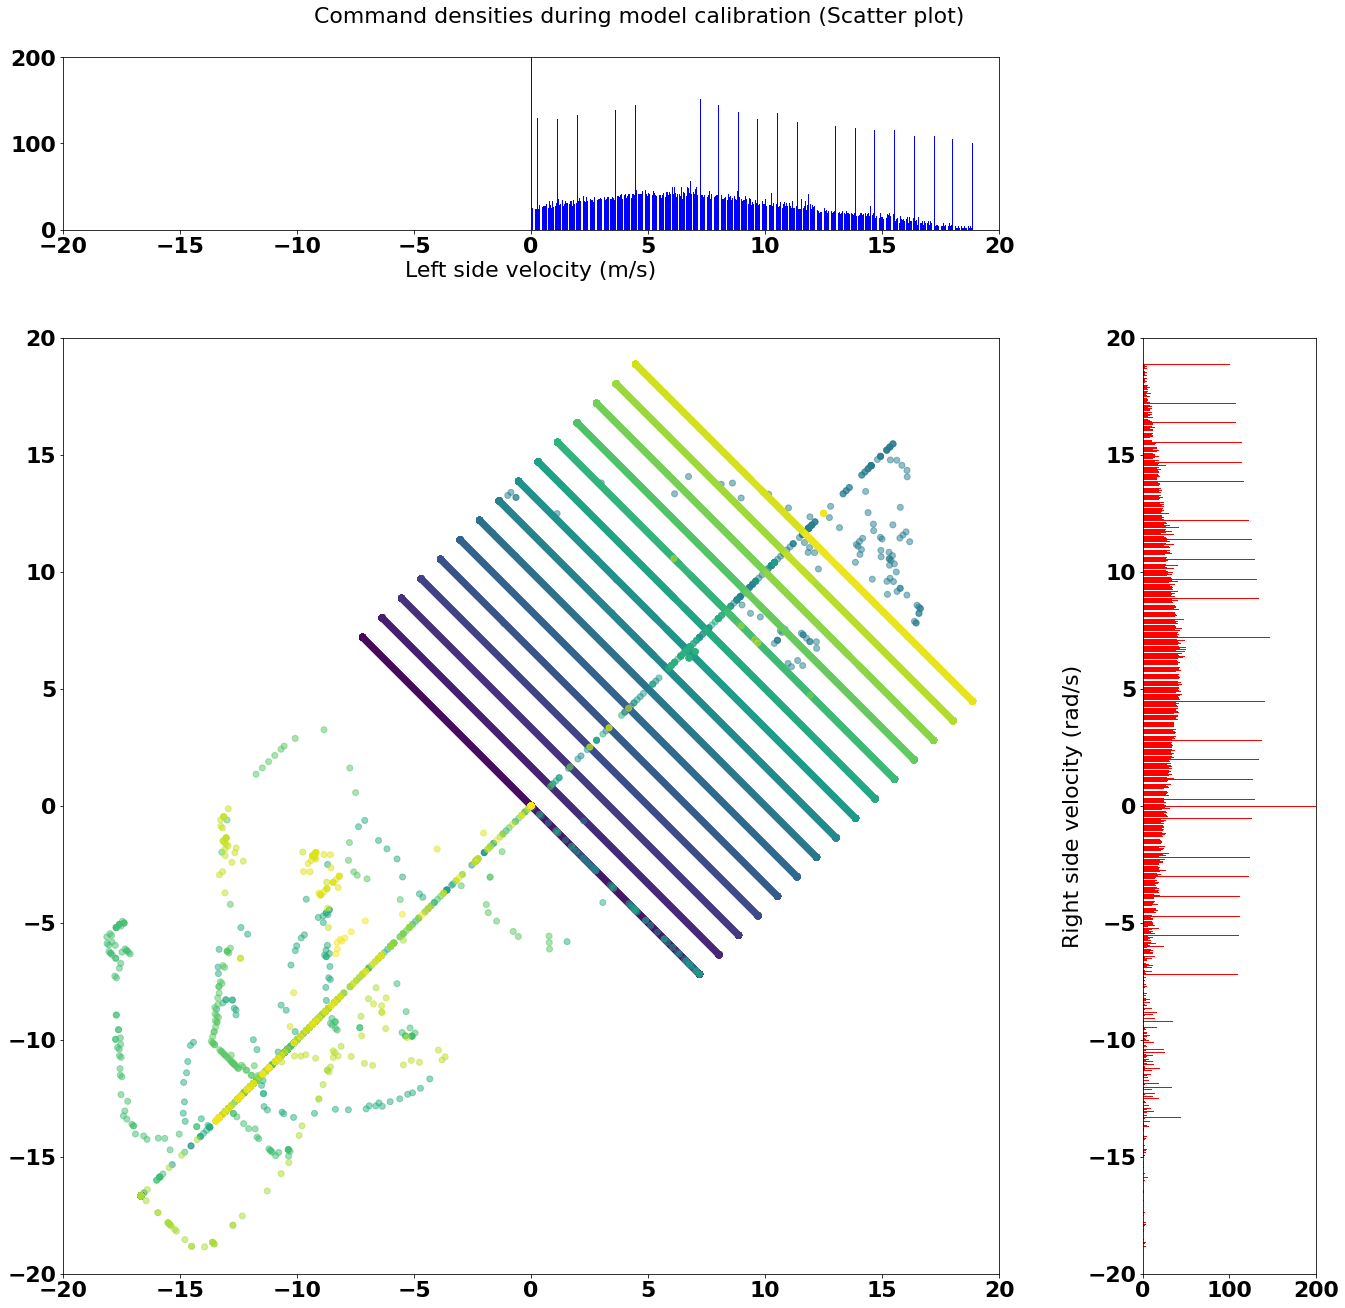

In [6]:
## Plot variable excitement
x = left_vel_cmd_arr.tolist()
y = right_vel_cmd_arr.tolist()

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.1

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h-0.025, width, 0.12]
rect_histy = [left_h, bottom, 0.12, height]

# start with a rectangular Figure
plt.figure(1, figsize=(20, 20))
plt.suptitle('Command densities during model calibration (Scatter plot)', fontsize=22)

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)


# the scatter plot:
scatter = axScatter.scatter(x, y, c=time_arr, alpha = 0.5)

# now determine nice limits by hand:
binwidthx = 0.05
binwidthy = 0.05
xmax = np.max(np.fabs(x))
limx = 20
ymax = np.max(np.fabs(y))
limy = 20

axScatter.set_xlim((-20, limx))
axScatter.set_ylim((-20, limx))

binsx = np.arange(0, limx + binwidthx, binwidthx)
binsy = np.arange(-limy, limy + binwidthy, binwidthy)
axHistx.hist(x, bins=binsx, align='mid', rwidth=0.8, color='b')
axHistx.set_ylim(0, 200)
axHisty.hist(y, bins=binsy, align='mid', orientation='horizontal', rwidth=0.8, color = 'r')
axHisty.set_xlim(0, 200)

axHistx.set_xlabel('Left side velocity (m/s)')
axHisty.set_ylabel('Right side velocity (rad/s)')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

NameError: name 'comp_disp' is not defined